In [2]:
import uptide
import uptide.tidal_netcdf
import os.path
import datetime
import numpy as np
import utm
import sys
import matplotlib.pyplot as plt
import csv
import pandas as pd
import fes

In [16]:
pwd

'/home/angel/tools/fes2014/libfes-2.9.0/python/examples'

In [73]:
rvk = pd.read_csv('rvk_example.txt', sep = '\t', names = ['ssh'], index_col = 0)

In [53]:
rvk.index = pd.to_datetime(rvk.index)

In [81]:
pp=rvk.to_numpy

In [54]:
rvk['ssh_corrected']=rvk['ssh']-02.442

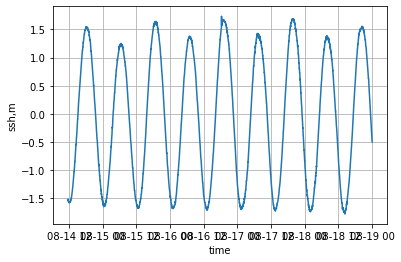

In [57]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh']-2.442)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too


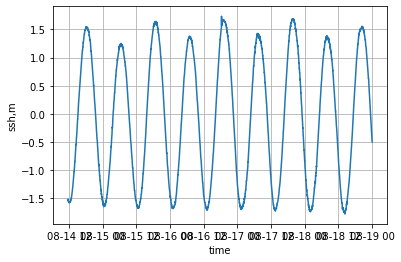

In [56]:
plt.plot(rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh_corrected'])
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too

In [65]:
kk=rvk['2019-08-14 00:00':'2019-08-19 00:00:00']['ssh_corrected']

In [42]:
def extract_series(tnci, ll, trange):
    etas = []
    for t in trange:
        tnci.set_time(t)
        eta = tnci.get_val(ll)
        etas.append(eta)
    return etas

In [43]:
tide = uptide.Tides(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

In [44]:
np.size(uptide.ALL_FES2014_TIDAL_CONSTITUENTS)

33

In [45]:
uptide.analysis

<module 'uptide.analysis' from '/home/angel/.local/lib/python3.7/site-packages/uptide/analysis.py'>

In [48]:
#tide.set_initial_time(datetime.datetime(2005,3,1,16,0))
#tide.set_initial_time(datetime.datetime(2019,8,14,0,0))
tnci = uptide.FES2014TidalInterpolator('/home/angel/tools/fes-2.9.1-Source/data/fes2014/ocean_tide.ini')

In [49]:
help(tnci)

Help on FES2014TidalInterpolator in module uptide.fes_interpolator object:

class FES2014TidalInterpolator(TidalInterpolator)
 |  FES2014TidalInterpolator(tide_or_fes_ini_file, fes_data_path=None, include_long_period=True)
 |  
 |  Tidal interpolator based on FES2014 global solution.
 |  
 |  For any given time and lat, lon, interpolates amplitude and phases of
 |  the harmonic constituents of the FES2014 global tide solution and reconstructs
 |  the tidal elevation in that point.
 |  
 |  Data can be downloaded from ftp://ftp.aviso.altimetry.fr/auxiliary/tide_model/fes2014_elevations_and_load/fes2014b_elevations/
 |  Download either ocean_tide.tar.xz or ocean_tide_extrapolated.tar.xz (latter extrapolates amplitudes and phases inland
 |  so that interpolation in coastal locations is less dependent on being exactly within the FES2014 grid) and extract
 |  the netcdf files. For ftp access yYou need prior registration as described here:
 |      https://www.aviso.altimetry.fr/en/data/produ

In [50]:
tnci.set_initial_time(datetime.datetime(2020,2,10,0,0))

In [26]:
#Valadata
#lat = 64.2 
#lon = 360-21.8

In [51]:
#rvk
lat=-64.153
lon=360-21.935

In [ ]:
#grnrvk
lat=-63.83
lon=360-22.43

In [ ]:
#porlaks
lat=-63.86
lon=360-21.35

In [ ]:
#ebakki
lat=-63.86
lon=360-21.17

In [27]:
lon

338.2

In [52]:
dt0 = datetime.datetime(2020,2,10,0,0,0)
trange = np.arange(0., 24.*5., 1/60)*3600.
series = {}

#for dt
#tnci.set_time(9*3600)


In [53]:
series['FES2014'] = extract_series(tnci, (lat, lon), trange)

In [54]:
ee = extract_series(tnci, (lat, lon), trange)

In [23]:
np.size(ee)

7200

In [24]:
24*60*5    #the last number correspond to the number of days as in np.arange

7200

In [55]:
arr = dt0 + pd.to_timedelta(np.arange(np.size(ee)), 'm')
#arr = this is making this in minutes 5 days 24hrs/day * 60 min/hr 

In [38]:
arr

DatetimeIndex(['2020-02-10 00:00:00', '2020-02-10 00:01:00',
               '2020-02-10 00:02:00', '2020-02-10 00:03:00',
               '2020-02-10 00:04:00', '2020-02-10 00:05:00',
               '2020-02-10 00:06:00', '2020-02-10 00:07:00',
               '2020-02-10 00:08:00', '2020-02-10 00:09:00',
               ...
               '2020-02-14 23:50:00', '2020-02-14 23:51:00',
               '2020-02-14 23:52:00', '2020-02-14 23:53:00',
               '2020-02-14 23:54:00', '2020-02-14 23:55:00',
               '2020-02-14 23:56:00', '2020-02-14 23:57:00',
               '2020-02-14 23:58:00', '2020-02-14 23:59:00'],
              dtype='datetime64[ns]', length=7200, freq=None)

In [71]:
amp,pha = uptide.harmonic_analysis(tide,kk)

TypeError: harmonic_analysis() missing 1 required positional argument: 't'

In [56]:
df = pd.DataFrame({'dates_fes':arr,'ssh_fes':ee}).set_index('dates_fes')

In [40]:
eta = tnci.get_val((lat, lon))

In [30]:
eta

array([0.26776936])

In [45]:
cc = tnci.fh((lat, lon))

TypeError: 'fes.Handler' object is not callable

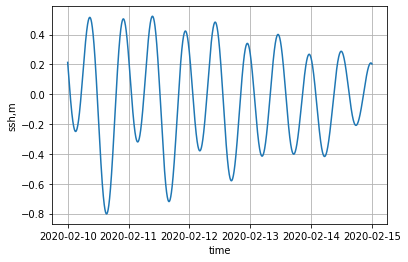

In [57]:
plt.plot(arr,ee)
plt.xlabel('time')
plt.ylabel('ssh,m')
plt.grid(True)

In [56]:
df.to_csv('tides_62.4N_21.8W_102019_022020.csv')

Text(0.5, 1.0, 'RVK, FES vs OBS: August 2019')

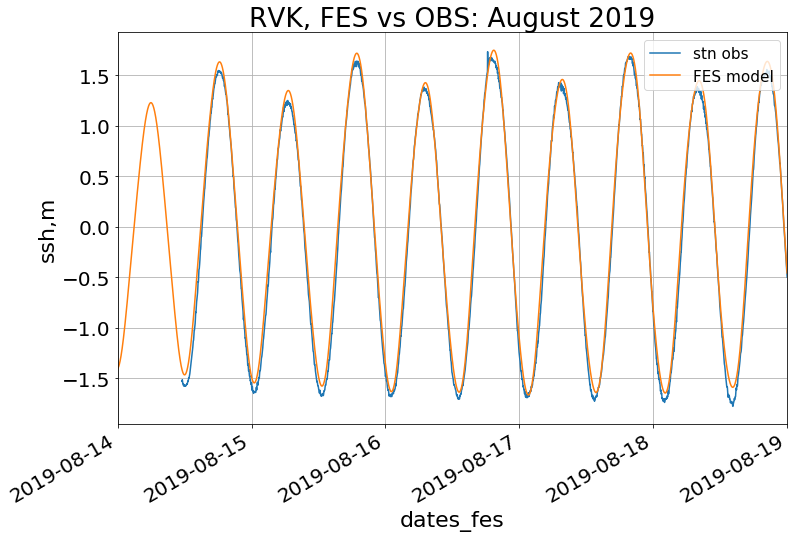

In [176]:
fig,ax=plt.subplots(1,1,figsize=(12,8))
rvk.loc['2019-08-14 00:00':'2019-08-19 00:00:00','ssh_corrected'].plot(ax=ax, label='stn obs')
df.loc['2019-08-14 00:00':'2019-08-19 00:00:00','ssh_fes'].plot(ax=ax, label='FES model')
legend=ax.legend(loc='upper right',fontsize = 'x-small')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.ylabel('ssh,m')
plt.grid(True)
plt.gca().xaxis.grid(True, which='minor')  # minor grid on too
#plt.title('Reykjavik, DMI vs OBS: February 2019')
plt.title('RVK, FES vs OBS: August 2019')

In [83]:
eta

1.3839459172343624